# Syed Ali
# COSC 731 Wine Quality Prediction using Hunt's Algorithm
# Code Implementation

In [1]:
#Data Analysis
import numpy as np
import pandas as pd

#plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

#Utility Libraries
import math
import random
from pprint import pprint

# Load and Prepare Data

In [2]:
#XData = pd.read_csv('WineQT.csv')
#YData = XData["Quality"]
#XData.drop(["id"], 
            #axis=1, inplace=True)

In [3]:
data = pd.read_csv('WineQT.csv',skiprows=1, names=['fixed_acidity','volatile_acidity','citrix_acid','residual_sugar','chlorides','free_sulfur_dioxide','total_sulfur_dioxide','density','pH','sulphates','alcohol','quality', 'id'], na_values='x')
data = data.drop(["id"], axis=1) # drop the id column as one of the decisions
# data['high_quality'] = 1
# data['high_quality'][data.quality < 7] = 0 # All wines less than excellent
data

,fixed_acidity,volatile_acidity,citrix_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6


In [4]:
data.shape

(1143, 12)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1143 non-null   float64
 1   volatile_acidity      1143 non-null   float64
 2   citrix_acid           1143 non-null   float64
 3   residual_sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free_sulfur_dioxide   1143 non-null   float64
 6   total_sulfur_dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 107.3 KB


# Train-Test-Split

In [6]:
# def traintestsplit(data, testDataSize)
#indices = range(data.shape[0])
#trainingInstances = int(0.8 * data.shape[0])
#np.random.shuffle(indices)
#trainIndex = indices[:trainingIndices]
#testIndex = indices[trainingIndices:]
#XDataTrain, XDataTest = XData.iloc[trainIndex], XData.iloc[testIndices]
#YDataTrain, YDataTest = XData.iloc[trainIndex], YData.iloc[testIndex]


In [7]:
def trainTestSplit(data, testDataSize):
   
    if isinstance(testDataSize, float):
        testDataSize = round(testDataSize * len(data))
    
    Index = data.index.tolist()
    testIndex = random.sample(population = Index, k = testDataSize)
    
    testData = data.loc[testIndex]
    trainData = data.drop(testIndex)
    
    return trainData, testData

In [8]:
random.seed(0)
trainData, testData = trainTestSplit(data, testDataSize = 20)

In [9]:
trainedData = trainData.values
trainedData[:5]

array([[7.400e+00, 7.000e-01, 0.000e+00, 1.900e+00, 7.600e-02, 1.100e+01,
        3.400e+01, 9.978e-01, 3.510e+00, 5.600e-01, 9.400e+00, 5.000e+00],
       [7.800e+00, 8.800e-01, 0.000e+00, 2.600e+00, 9.800e-02, 2.500e+01,
        6.700e+01, 9.968e-01, 3.200e+00, 6.800e-01, 9.800e+00, 5.000e+00],
       [7.800e+00, 7.600e-01, 4.000e-02, 2.300e+00, 9.200e-02, 1.500e+01,
        5.400e+01, 9.970e-01, 3.260e+00, 6.500e-01, 9.800e+00, 5.000e+00],
       [1.120e+01, 2.800e-01, 5.600e-01, 1.900e+00, 7.500e-02, 1.700e+01,
        6.000e+01, 9.980e-01, 3.160e+00, 5.800e-01, 9.800e+00, 6.000e+00],
       [7.400e+00, 7.000e-01, 0.000e+00, 1.900e+00, 7.600e-02, 1.100e+01,
        3.400e+01, 9.978e-01, 3.510e+00, 5.600e-01, 9.400e+00, 5.000e+00]])

# Check if data is pure

In [10]:
def checkPurity(trainedData):
    labelColumn = data.quality
    labelColumn = trainedData[:, -1]
    uniqueClasses = np.unique(labelColumn)
    
    if len(uniqueClasses) == 1:
        return True
    else:
        return False

# Classify

In [11]:
def classifyData(trainedData):
    labelColumn = data.quality
    labelColumn = trainedData[:, -1]
    uniqueClasses, countuniqueClasses = np.unique(labelColumn, return_counts = True)
    
    index = countuniqueClasses.argmax()
    classification = uniqueClasses[index]
    
    return classification

## Determine Type of Feature

In [12]:
for column in data.columns:
    print(column, "-", len(data[column].unique()))

fixed_acidity - 91
volatile_acidity - 135
citrix_acid - 77
residual_sugar - 80
chlorides - 131
free_sulfur_dioxide - 53
total_sulfur_dioxide - 138
density - 388
pH - 87
sulphates - 89
alcohol - 61
quality - 6


In [13]:
def determineTypeofFeature(data):
    
    featureTypes = []
    noofuniquevalues = 95
    for feature in data.columns:
        if feature != "quality":
            uniqueValues = data[feature].unique()
            exampleValues = uniqueValues[0]
            
            if(isinstance(exampleValues, str)) or (len(uniqueValues) >= noofuniquevalues):
                featureTypes.append("Categorical")
            else:
                featureTypes.append("Continuous")
    return featureTypes

In [26]:
featureTypes = determineTypeofFeature(data)
i = 0

for column in data.columns:
    i += 1
    print(column, "-", featureTypes[i])
    

fixed_acidity - Categorical
volatile_acidity - Continuous
citrix_acid - Continuous
residual_sugar - Categorical
chlorides - Continuous
free_sulfur_dioxide - Categorical
total_sulfur_dioxide - Categorical
density - Continuous
pH - Continuous
sulphates - Continuous


IndexError: list index out of range

# Cross Validation Split (Unable to make this work)

In [27]:
# def crossValidation(data, nFolds):
#     splitData = list()
#     copyData = list(data)
#     foldSize = int(len(data) / nFolds)
#     for i in range(nFolds):
#         fold = list()
#     while len(fold) < foldSize:
#         index = randrange(len(copyData))
#         fold.append(copyData.pop(index))
#         splitData.append(fold)
#     return splitData
 

# Potential Splits

In [28]:
def obtainPotentialSplits(trainedData): 
    
    potentialSplits = {}
    _, nColumns = trainedData.shape # ignoring rows
    for columnIndex in range(nColumns - 1): # excluding the last column which is the id
        value = trainedData[:, columnIndex]
        uniqueValues = np.unique(value)
        
        typeofFeature = featureTypes[columnIndex]
        if typeofFeature == "Continuous":
            potentialSplits[columnIndex] = []
            for index in range(len(uniqueValues)):
                if index != 0:
                    currentValue = uniqueValues[index]
                    previousValue = uniqueValues[index - 1]
                    potentialSplit = (currentValue + previousValue) / 2
                    
                    potentialSplits[columnIndex].append(potentialSplit)
        
        #if the feature is the categorical
        # there needs to be at least 2 unique values otherwise in the 
        # splitData function dataBelow would contain all data points and dataAbove would be empty
        elif len(uniqueValues) > 1:
            potentialSplits[columnIndex] = uniqueValues
    
    return potentialSplits

In [29]:
potentialSplits = obtainPotentialSplits(trainData.values)
potentialSplits


{0: [4.75,
  4.95,
  5.05,
  5.15,
  5.25,
  5.35,
  5.5,
  5.65,
  5.75,
  5.85,
  5.95,
  6.05,
  6.15,
  6.25,
  6.35,
  6.45,
  6.55,
  6.65,
  6.75,
  6.85,
  6.95,
  7.05,
  7.15,
  7.25,
  7.35,
  7.45,
  7.55,
  7.65,
  7.75,
  7.85,
  7.95,
  8.05,
  8.149999999999999,
  8.25,
  8.350000000000001,
  8.45,
  8.55,
  8.649999999999999,
  8.75,
  8.850000000000001,
  8.95,
  9.05,
  9.149999999999999,
  9.25,
  9.350000000000001,
  9.45,
  9.55,
  9.649999999999999,
  9.75,
  9.850000000000001,
  9.95,
  10.05,
  10.149999999999999,
  10.25,
  10.350000000000001,
  10.45,
  10.55,
  10.649999999999999,
  10.75,
  10.850000000000001,
  11.0,
  11.149999999999999,
  11.25,
  11.350000000000001,
  11.45,
  11.55,
  11.649999999999999,
  11.75,
  11.850000000000001,
  11.95,
  12.1,
  12.25,
  12.350000000000001,
  12.45,
  12.55,
  12.649999999999999,
  12.75,
  12.850000000000001,
  12.95,
  13.1,
  13.25,
  13.350000000000001,
  13.45,
  13.6,
  13.75,
  14.05,
  14.65,
  15.25,
 

C:\Users\syeda\anaconda3\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


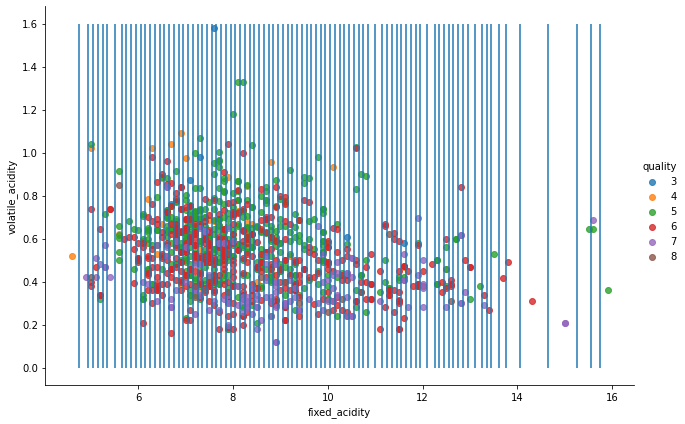

In [30]:
sns.lmplot(data = trainData, x = "fixed_acidity", y = "volatile_acidity", hue = "quality", fit_reg = False, size = 6, aspect = 1.5)
#ax1 = potentialSplits.plot.scatter(x = "fixed_acidity", y = "volatile_acidity", quality = "label", c = 'red')
plt.vlines(x = potentialSplits[0], ymin = 0, ymax = 1.6)

# Split Data

In [31]:
def splitData(trainedData, splitColumn, splitValue):
    
    splitColumnValues = trainedData[:, splitColumn]
    
    typeofFeature = featureTypes[splitColumn]
    
    if typeofFeature == "Continuous":
        dataBelow = trainedData[splitColumnValues <= splitValue]
        dataAbove = trainedData[splitColumnValues > splitValue]
        
        #if the feature is categorical
    else:
        dataBelow = trainedData[splitColumnValues == splitValue]
        dataAbove = trainedData[splitColumnValues != splitValue]
    
    return dataBelow, dataAbove

In [32]:
splitColumn = 8
splitValue = 0.6

In [33]:
dataBelow, dataAbove = splitData(trainedData, splitColumn, splitValue)

C:\Users\syeda\anaconda3\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


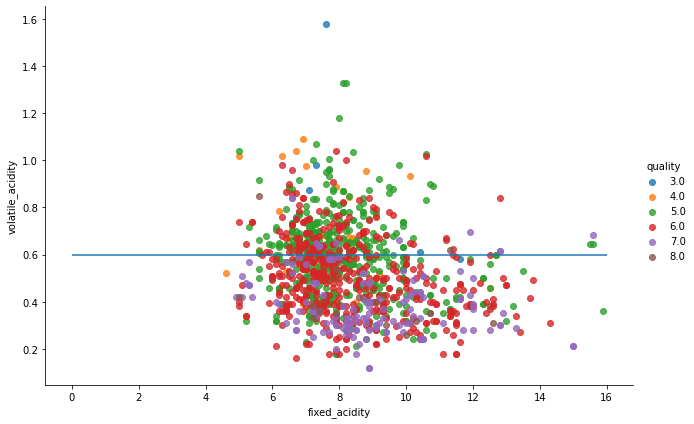

In [34]:
plot_df = pd.DataFrame(trainedData, columns = data.columns)
sns.lmplot(data = plot_df, x = "fixed_acidity", y = "volatile_acidity", hue = "quality", fit_reg = False, size = 6, aspect = 1.5)
#ax2 = plot_df.plot.scatter(x = "fixed_acidity", y = "volatile_acidity", label = "quality", color = "red")
plt.hlines(y = splitValue, xmin = 0, xmax = 16)

# Hunt's Alogrithm Based on Entropy

## Entropy

In [35]:
def calculateEntropy(trainedData):
    labelColumn = data.quality
    labelColumn = trainedData[:, -1]
    _, counts = np.unique(labelColumn, return_counts = True)
    
    probability = counts / counts.sum()
    entropy = sum(probability * -np.log2(probability))
    
    return entropy

In [36]:
def calculateoverallEntropy(dataBelow, dataAbove):
    
    n = len(dataBelow) + len(dataAbove)
    
    probdataBelow = len(dataBelow) / n
    probdataAbove = len(dataAbove) / n
    
    overallEntropy = (probdataBelow * calculateEntropy(dataBelow)
                     + probdataAbove * calculateEntropy(dataAbove))
   
    return overallEntropy

In [37]:
def determineBestSplit(trainedData, potentialSplits):
    
    overallEntropy = 9999
    for columnIndex in potentialSplits:
        for value in potentialSplits[columnIndex]:
            dataBelow, dataAbove = splitData(trainedData, splitColumn = columnIndex, splitValue = value)
            currentoverallEntropy = calculateoverallEntropy(dataBelow, dataAbove)
            
            if currentoverallEntropy <= overallEntropy:
                overallEntropy = currentoverallEntropy
                bestSplitColumn = columnIndex
                bestSplitValue = value
    
    return bestSplitColumn, bestSplitValue

##  Hunt's Decision Tree Algorithm based on Entropy

## Hunt's algorithm for a Pre-pruned tree

### Psuedo code: 
###### huntsAlgorithm(Node t, trainingdatabase D, split selection method S)
##### (1) Apply S to D to find the splitting criterion
##### (2) if(t is not a pure node) base case
##### (3) Create Children nodes of t
##### (4) Partition D into children partiitons
##### (5) Recurse on each partition
##### (6) endif


In [95]:
def huntsAlgorithm(data, count = 0, minSamples = 2, maxDepth = 3):
    
    #preparing data
    if count == 0:
        global columnHeaders, featureTypes
        columnHeaders = data.columns
        featureTypes = determineTypeofFeature(data)
        winedata = data.values
    else:
        winedata = data
    
    #base cases 
    if (checkPurity(winedata)) or (len(winedata)  < minSamples)  or (count == maxDepth):
        classification = classifyData(winedata)
        
        return classification
    
    # recursive section
    else:
        count += 1
        
        #helper functions
        potentialSplits = obtainPotentialSplits(winedata)
        #splitColumn, splitValue = crossValidation(winedata, 5)
        splitColumn, splitValue = determineBestSplit(winedata, potentialSplits)
        dataBelow, dataAbove  = splitData(winedata, splitColumn, splitValue)
        #dataBelow, dataAbove = crossValidate(winedata, 2)
       
       # check for empty data
        if len(dataBelow) == 0 or len(dataAbove) == 0:
            classification = classifyData(winedata)
            return classification
    
        # determine whether the data is categorical or continuous
        featureName = columnHeaders[splitColumn]
        typeofFeature = featureTypes[splitColumn]
        if typeofFeature == "Continuous":
            determine = "{} <= {}".format(featureName, splitValue)
            
            #if data is categorical
        else:
            determine = "{} = {}".format(featureName, splitValue)
            
        #start sub-tree
        subTree = {determine: []}
        
        #find solutions (recursion)
        good = huntsAlgorithm(dataBelow, count, minSamples, maxDepth)
        #average = huntsAlgorithm(dataBelow, count, minSamples, maxDepth)
        bad = huntsAlgorithm(dataAbove, count, minSamples, maxDepth)
        
        #if answers are similar then we don't need to bother determining if the quality is good
        # This would happen if the data is classified even though the data is not pure
        
        if good == bad:
            subTree = good
        else:
            subTree[determine].append(good)
            subTree[determine].append(bad)
            #subTree[determine].append(average)
        
        return subTree
        

In [96]:
huntsTree = huntsAlgorithm(trainData,  maxDepth = 10)
pprint(huntsTree)

{'alcohol <= 10.525': [{'sulphates <= 0.625': [{'citrix_acid <= 0.055': [{'sulphates <= 0.525': [{'citrix_acid <= 0.025': [{'density = 0.99798': [4.0,
                                                                                                                                                  {'density = 0.9946': [7.0,
                                                                                                                                                                        5.0]}]},
                                                                                                                           {'residual_sugar <= 1.9': [{'density = 0.99587': [5.0,
                                                                                                                                                                             4.0]},
                                                                                                                                             

## Classification

In [40]:
subTree = {"determine": ["good",
                         "bad"]}
subTree

{'determine': ['good', 'bad']}

In [41]:
test = testData.iloc[1]
test

fixed_acidity            9.00000
volatile_acidity         0.39000
citrix_acid              0.40000
residual_sugar           1.30000
chlorides                0.04400
free_sulfur_dioxide     25.00000
total_sulfur_dioxide    50.00000
density                  0.99478
pH                       3.20000
sulphates                0.83000
alcohol                 10.90000
quality                  6.00000
Name: 861, dtype: float64

In [97]:
def classify(test, huntsTree):
    determine = list(huntsTree.keys())[0]
    featureName, comparison, val = determine.split(" ")
    
    #determination
    if comparison == "<=": #feature is continuous
        if test[featureName] <= float(val):
            soln = huntsTree[determine][0]
        else:
            soln = huntsTree[determine][1]
            
    #if the feature is categorical
    else:
        if str(test[featureName]) == val:
            soln = huntsTree[determine][0]
        else:
            soln = huntsTree[determine][1]
    
    # if the case is base
    if not isinstance(soln, dict):
        return soln
    
    #recursive part
    else:
        residual = soln
        return classify(test, residual)

In [98]:
classify(test, huntsTree)

6.0

## Determine Accuracy

In [99]:
def accuracy(data, huntsTree):
   
    data["classification"] = data.apply(classify, axis = 1, args = (huntsTree,))
    data["correct_classification"] = data["classification"] == data["quality"]
    
    accuracy = data["correct_classification"].mean()
    
    return accuracy

In [100]:
accuracy = accuracy(testData, huntsTree)
accuracy

0.5847953216374269

In [101]:
testData

,fixed_acidity,volatile_acidity,citrix_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,classification,correct_classification
1074,6.7,0.760,0.02,1.8,0.078,6.0,12.0,0.99600,3.55,0.63,9.95,3,6.0,False
583,7.3,0.490,0.10,2.6,0.068,4.0,14.0,0.99562,3.30,0.47,10.50,5,5.0,True
139,7.6,0.550,0.21,2.2,0.071,7.0,28.0,0.99640,3.28,0.55,9.70,5,5.0,True
683,10.4,0.260,0.48,1.9,0.066,6.0,10.0,0.99724,3.33,0.87,10.90,6,6.0,True
986,6.0,0.490,0.00,2.3,0.068,15.0,33.0,0.99292,3.58,0.59,12.50,6,6.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
706,9.1,0.300,0.34,2.0,0.064,12.0,25.0,0.99516,3.26,0.84,11.70,7,7.0,True
291,7.0,0.580,0.12,1.9,0.091,34.0,124.0,0.99560,3.44,0.48,10.50,5,5.0,True
594,7.5,0.685,0.07,2.5,0.058,5.0,9.0,0.99632,3.38,0.55,10.90,4,5.0,False
1021,6.1,0.400,0.16,1.8,0.069,11.0,25.0,0.99550,3.42,0.74,10.10,7,6.0,False


# Hunt's Algorithm Based on Gini

In [47]:
def calculateGini(trainedData):
    labelColumn = data.quality
    labelColumn = trainedData[:, -1]
    _, counts = np.unique(labelColumn, return_counts = True)
    
    probability = counts / counts.sum()
    giniIndex =  1 - sum(probability**2)
    
    return giniIndex

In [48]:
def calculateoverallGini(dataBelow, dataAbove):
    
    n = len(dataBelow) + len(dataAbove)
    
    probdataBelow = len(dataBelow) / n
    probdataAbove = len(dataAbove) / n
    
    overallGini = (probdataBelow * calculateGini(dataBelow)
                     + probdataAbove * calculateGini(dataAbove))
   
    return overallGini

In [49]:
def determineBestSplitGini(trainedData, potentialSplits):
    
    overallGini = 9999
    for columnIndex in potentialSplits:
        for value in potentialSplits[columnIndex]:
            dataBelow, dataAbove = splitData(trainedData, splitColumn = columnIndex, splitValue = value)
            currentoverallGini = calculateoverallGini(dataBelow, dataAbove)
            
            if currentoverallGini <= overallGini:
                overallGini = currentoverallGini
                bestSplitColumn = columnIndex
                bestSplitValue = value
    
    return bestSplitColumn, bestSplitValue

## Hunt's Decision Tree Algorithm based on Gini

## Determine Type of Feature

In [50]:
def determineTypeofFeature(data):
    
    featureTypes = []
    noofuniquevalues = 95
    for feature in data.columns:
        if feature != "quality":
            uniqueValues = data[feature].unique()
            exampleValues = uniqueValues[0]
            
            if(isinstance(exampleValues, str)) or (len(uniqueValues) >= noofuniquevalues):
                featureTypes.append("Categorical")
            else:
                featureTypes.append("Continuous")
    return featureTypes

# Hunt's algorithm for a prepruned tree

In [51]:
def huntsAlgorithmGini(data, count = 0, minSamples = 2, maxDepth = 5):
    
    #preparing data
    if count == 0:
        global columnHeaders, featureTypes
        columnHeaders = data.columns
        featureTypes = determineTypeofFeature(data)
        winedata = data.values
    else:
        winedata = data
    
    #base cases 
    if (checkPurity(winedata)) or (len(winedata)  < minSamples)  or (count == maxDepth):
        classification = classifyData(winedata)
        
        return classification
    
    # recursive section
    else:
        count += 1
        
        #helper functions
        potentialSplits = obtainPotentialSplits(winedata)
        splitColumn, splitValue = determineBestSplitGini(winedata, potentialSplits)
        dataBelow, dataAbove  = splitData(winedata, splitColumn, splitValue)
        
        # check for empty data
        if len(dataBelow) == 0 or len(dataAbove) == 0:
            classification = classifyData(winedata)
            return classification
    
        # determine whether the data is categorical or continuous
        featureName = columnHeaders[splitColumn]
        typeofFeature = featureTypes[splitColumn]
        if typeofFeature == "Continuous":
            determine = "{} <= {}".format(featureName, splitValue)
            
            #if data is categorical
        else:
            determine = "{} = {}".format(featureName, splitValue)
            
        
        #start sub-tree
        subTree = {determine: []}
        
        #find solutions (recursion)
        good = huntsAlgorithmGini(dataBelow, count, minSamples, maxDepth)
        #average = huntsAlgorithmGini(dataBelow, count, minSamples, maxDepth)
        bad = huntsAlgorithmGini(dataAbove, count, minSamples, maxDepth)
        
        #if answers are similar then we don't need to determining the quality of wine
        # This would happen if the data is classified even though the data is not pure
        
        if good == bad:
            subTree = good
        else:
            subTree[determine].append(good)
            #subTree[determine].append(average)
            subTree[determine].append(bad)
        
        return subTree
        

In [52]:
huntsTreeGini = huntsAlgorithmGini(trainData, maxDepth = 5)
pprint(huntsTreeGini)

{'alcohol <= 10.525': [{'sulphates <= 0.585': [{'alcohol <= 9.75': [{'pH <= 3.545': [{'density = 0.99888': [6.0,
                                                                                                            5.0]},
                                                                                     6.0]},
                                                                    {'sulphates <= 0.545': [{'density = 0.99538': [6.0,
                                                                                                                   5.0]},
                                                                                            {'density = 0.99568': [7.0,
                                                                                                                   6.0]}]}]},
                                               {'fixed_acidity <= 10.850000000000001': [{'alcohol <= 9.850000000000001': [5.0,
                                                                 

In [53]:
subTree = {"determine": ["good",
                         "bad"]}
subTree

{'determine': ['good', 'bad']}

In [54]:
testGini = testData.iloc[0]
testGini

fixed_acidity                 7.0
volatile_acidity             0.69
citrix_acid                  0.07
residual_sugar                2.5
chlorides                   0.091
free_sulfur_dioxide          15.0
total_sulfur_dioxide         21.0
density                   0.99572
pH                           3.38
sulphates                     0.6
alcohol                      11.3
quality                         6
classification                6.0
correct_classification       True
Name: 788, dtype: object

In [55]:
def classifyGini(testGini, huntsTreeGini):
    determine = list(huntsTreeGini.keys())[0]
    featureName, comparison, val = determine.split(" ")
    
    #determination
    if comparison == "<=": #feature is continuous
        if testGini[featureName] <= float(val):
            soln = huntsTreeGini[determine][0]
        else:
            soln = huntsTreeGini[determine][1]
            
    #if the feature is categorical
    else:
        if str(testGini[featureName]) == val:
            soln = huntsTreeGini[determine][0]
        else:
            soln = huntsTreeGini[determine][1]
    
    # if the case is base
    if not isinstance(soln, dict):
        return soln
    
    #recursive part
    else:
        residual = soln
        return classifyGini(testGini, residual)

In [56]:
classifyGini(testGini, huntsTreeGini)

6.0

In [57]:
def accuracyGini(data, huntsTreeGini):
   
    data["classification"] = data.apply(classify, axis = 1, args = (huntsTreeGini,))
    data["correct_classification"] = data["classification"] == data["quality"]
    
    accuracyGini = data["correct_classification"].mean()
    
    return accuracyGini

In [58]:
accuracyGini = accuracyGini(testData, huntsTreeGini)
accuracyGini

0.75

In [59]:
testData

,fixed_acidity,volatile_acidity,citrix_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,classification,correct_classification
788,7.0,0.690,0.07,2.50,0.091,15.0,21.0,0.99572,3.38,0.60,11.3,6,6.0,True
861,9.0,0.390,0.40,1.30,0.044,25.0,50.0,0.99478,3.20,0.83,10.9,6,6.0,True
82,8.3,0.540,0.28,1.90,0.077,11.0,40.0,0.99780,3.39,0.61,10.0,6,6.0,True
530,11.1,0.390,0.54,2.70,0.095,21.0,101.0,1.00010,3.13,0.51,9.5,5,5.0,True
1047,10.0,0.690,0.11,1.40,0.084,8.0,24.0,0.99578,2.88,0.47,9.7,5,5.0,True
995,7.6,0.300,0.42,2.00,0.052,6.0,24.0,0.99630,3.44,0.82,11.9,6,7.0,False
829,7.6,0.360,0.31,1.70,0.079,26.0,65.0,0.99716,3.46,0.62,9.5,6,5.0,False
621,7.6,0.715,0.00,2.10,0.068,30.0,35.0,0.99533,3.48,0.65,11.4,6,6.0,True
976,8.2,0.885,0.20,1.40,0.086,7.0,31.0,0.99460,3.11,0.46,10.0,5,5.0,True
733,6.9,0.440,0.00,1.40,0.070,32.0,38.0,0.99438,3.32,0.58,11.4,6,6.0,True


# Hunt's Decision Tree Algorithm based on Misclassification for a prepruned tree

## Hunt's Decision Tree Algorithm based on Misclassification

In [60]:
def calculateMisclassification(trainedData):
    labelColumn = data.quality
    labelColumn = trainedData[:, -1]
    _, counts = np.unique(labelColumn, return_counts = True)
    
    probability = counts / counts.sum()
    Misclassification =  1 - (np.max(probability))
    
    return Misclassification

In [61]:
def calculateoverallMisclassification(dataBelow, dataAbove):
    
    n = len(dataBelow) + len(dataAbove)
    
    probdataBelow = len(dataBelow) / n
    probdataAbove = len(dataAbove) / n
    
    overallMisclassification = (probdataBelow * calculateMisclassification(dataBelow)
                     + probdataAbove * calculateMisclassification(dataAbove))
   
    return overallMisclassification

In [62]:
def determineBestSplitMisclassification(trainedData, potentialSplits):
    
    overallMisclassification = 9999
    for columnIndex in potentialSplits:
        for value in potentialSplits[columnIndex]:
            dataBelow, dataAbove = splitData(trainedData, splitColumn = columnIndex, splitValue = value)
            currentoverallMisclassification = calculateoverallMisclassification(dataBelow, dataAbove)
            
            if currentoverallMisclassification <= overallMisclassification:
                overallMisclassification = currentoverallMisclassification
                bestSplitColumn = columnIndex
                bestSplitValue = value
    
    return bestSplitColumn, bestSplitValue

## Hunt's Decision Tree Algorithm based on Misclassification

## Determine Type of Feature

In [63]:
def determineTypeofFeature(data):
    
    featureTypes = []
    noofuniquevalues = 95
    for feature in data.columns:
        if feature != "quality":
            uniqueValues = data[feature].unique()
            exampleValues = uniqueValues[0]
            
            if(isinstance(exampleValues, str)) or (len(uniqueValues) >= noofuniquevalues):
                featureTypes.append("Categorical")
            else:
                featureTypes.append("Continuous")
    return featureTypes

## Hunt's algorithm

In [64]:
def huntsAlgorithmMisclassification(data, count = 0, minSamples = 2, maxDepth = 5):
    
    #preparing data
    if count == 0:
        global columnHeaders, featureTypes
        columnHeaders = data.columns
        featureTypes = determineTypeofFeature(data)
        winedata = data.values
    else:
        winedata = data
    
    #base cases 
    if (checkPurity(winedata)) or (len(winedata)  < minSamples)  or (count == maxDepth):
        classification = classifyData(winedata)
        
        return classification
    
    # recursive section
    else:
        count += 1
        
        #helper functions
        potentialSplits = obtainPotentialSplits(winedata)
        splitColumn, splitValue = determineBestSplitMisclassification(winedata, potentialSplits)
        dataBelow, dataAbove  = splitData(winedata, splitColumn, splitValue)
        
        # check for empty data
        if len(dataBelow) == 0 or len(dataAbove) == 0:
            classification = classifyData(winedata)
            return classification
    
        # determine whether the data is categorical or continuous
        featureName = columnHeaders[splitColumn]
        typeofFeature = featureTypes[splitColumn]
        if typeofFeature == "Continuous":
            determine = "{} <= {}".format(featureName, splitValue)
            
            #if data is categorical
        else:
            determine = "{} = {}".format(featureName, splitValue)
            
        #start sub-tree
        subTree = {determine: []}
        
        
        #find solutions (recursion)
        good = huntsAlgorithmMisclassification(dataBelow, count, minSamples, maxDepth)
        bad = huntsAlgorithmMisclassification(dataAbove, count, minSamples, maxDepth)
        
        #if answers are similar then we don't need to bother asking the question
        # This would happen if the data is classified even though the data is not pure
        
        if good == bad:
            subTree = good
        else:
            subTree[determine].append(good)
            subTree[determine].append(bad)
        
        return subTree
        

In [65]:
huntsTreeMisclassification = huntsAlgorithmMisclassification(trainData, maxDepth = 5)
pprint(huntsTreeMisclassification)

{'alcohol <= 10.25': [{'fixed_acidity <= 10.850000000000001': [{'volatile_acidity = 0.51': [{'alcohol <= 9.35': [5.0,
                                                                                                                 6.0]},
                                                                                            {'density = 0.9984': [{'free_sulfur_dioxide <= 17.5': [6.0,
                                                                                                                                                   5.0]},
                                                                                                                  {'density = 0.9972': [6.0,
                                                                                                                                        5.0]}]}]},
                                                               {'sulphates <= 0.565': [5.0,
                                                                            

In [66]:
subTree = {"determine": ["good",
                         "bad"]}
subTree

{'determine': ['good', 'bad']}

In [67]:
testMisclassification = testData.iloc[0]
testMisclassification

fixed_acidity                 7.0
volatile_acidity             0.69
citrix_acid                  0.07
residual_sugar                2.5
chlorides                   0.091
free_sulfur_dioxide          15.0
total_sulfur_dioxide         21.0
density                   0.99572
pH                           3.38
sulphates                     0.6
alcohol                      11.3
quality                         6
classification                6.0
correct_classification       True
Name: 788, dtype: object

In [68]:
def classifyMisclassification(testMisclassification, huntsTreeMisclassification):
    determine = list(huntsTreeMisclassification.keys())[0]
    featureName, comparison, val = determine.split(" ")
    
    #determination
    if comparison == "<=": #feature is continuous
        if testMisclassification[featureName] <= float(val):
            soln = huntsTreeMisclassification[determine][0]
        else:
            soln = huntsTreeMisclassification[determine][1]
            
    #if the feature is categorical
    else:
        if str(testMisclassification[featureName]) == val:
            soln = huntsTreeMisclassification[determine][0]
        else:
            soln = huntsTreeMisclassification[determine][1]
    
    # if the case is base
    if not isinstance(soln, dict):
        return soln
    
    #recursive part
    else:
        residual = soln
        return classifyMisclassification(testMisclassification, residual)

In [69]:
classifyMisclassification(testMisclassification, huntsTreeMisclassification)

6.0

In [70]:
def accuracyMisclassification(data, huntsTreeMisclassification):
   
    data["classification"] = data.apply(classify, axis = 1, args = (huntsTreeMisclassification,))
    data["correct_classification"] = data["classification"] == data["quality"]
    
    accuracyMisclassification = data["correct_classification"].mean()
    
    return accuracyMisclassification

In [71]:
accuracyMisclassification = accuracyMisclassification(testData, huntsTreeMisclassification)
accuracyMisclassification

0.65

In [72]:
testData

,fixed_acidity,volatile_acidity,citrix_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,classification,correct_classification
788,7.0,0.690,0.07,2.50,0.091,15.0,21.0,0.99572,3.38,0.60,11.3,6,6.0,True
861,9.0,0.390,0.40,1.30,0.044,25.0,50.0,0.99478,3.20,0.83,10.9,6,6.0,True
82,8.3,0.540,0.28,1.90,0.077,11.0,40.0,0.99780,3.39,0.61,10.0,6,5.0,False
530,11.1,0.390,0.54,2.70,0.095,21.0,101.0,1.00010,3.13,0.51,9.5,5,5.0,True
1047,10.0,0.690,0.11,1.40,0.084,8.0,24.0,0.99578,2.88,0.47,9.7,5,5.0,True
995,7.6,0.300,0.42,2.00,0.052,6.0,24.0,0.99630,3.44,0.82,11.9,6,6.0,True
829,7.6,0.360,0.31,1.70,0.079,26.0,65.0,0.99716,3.46,0.62,9.5,6,5.0,False
621,7.6,0.715,0.00,2.10,0.068,30.0,35.0,0.99533,3.48,0.65,11.4,6,6.0,True
976,8.2,0.885,0.20,1.40,0.086,7.0,31.0,0.99460,3.11,0.46,10.0,5,5.0,True
733,6.9,0.440,0.00,1.40,0.070,32.0,38.0,0.99438,3.32,0.58,11.4,6,6.0,True


# Post Pruning

In [73]:
def createLeaf(trainedData, task):
    labelColumn = data.quality
    labelColumn = trainedData[:, -1]
    if task == "regression":
        leaf = np.mean(labelColumn)
    
    
    # classification
    else:
        uniqueClasses, countuniqueClasses = np.unique(labelColumn, return_counts = True)
        index = countuniqueClasses.argmax()
        leaf = uniqueClasses[index]
    
    return leaf

In [74]:
def calculateMSE(trainedData):
    actualValues = trainedData[:, -1]
    if len(actualValues) == 0: #empty data
        mse = 0
    
    else:
        prediction = np.mean(actualValues)
        mse = np.mean((actualValues - prediction)**2)
    
    return mse

In [75]:
mse = calculateMSE(trainedData)
mse

0.6517763051995474

In [76]:
def calculateoverallMetric(dataBelow, dataAbove, metric):
    
    n = len(dataBelow) + len(dataAbove)
    
    probdataBelow = len(dataBelow) / n
    probdataAbove = len(dataAbove) / n
    
    overallMetric = (probdataBelow * metric(dataBelow)
                + probdataAbove * metric(dataAbove))
   
    return overallMetric

In [77]:
def determineBestSplitMetric(trainedData, potentialSplits, task):
    
    firstIteration = True
    for columnIndex in potentialSplits:
        for value in potentialSplits[columnIndex]:
            dataBelow, dataAbove = splitData(trainedData, splitColumn = columnIndex, splitValue = value)
            
            if task == "regression":
                currentoverallMetric= calculateoverallMetric(dataBelow, dataAbove, metric = calculateMSE)
            
            else:
                currentoverallMetric = calculateoverallMetric(dataBelow, dataAbove, metric = calculateEntropy)

            
            if firstIteration or currentoverallMetric <= bestoverallMetric:
                firstIteration = False
                bestoverallMetric = currentoverallMetric
                bestSplitColumn = columnIndex
                bestSplitValue = value
    
    return bestSplitColumn, bestSplitValue


In [78]:
def huntsAlgorithmPruned(data, task, count = 0, minSamples = 2, maxDepth = 5):
    
    #preparing data
    if count == 0:
        global columnHeaders, featureTypes
        columnHeaders = data.columns
        featureTypes = determineTypeofFeature(data)
        winedata = data.values
    else:
        winedata = data
    
    #base cases 
    if (checkPurity(winedata)) or (len(winedata)  < minSamples)  or (count == maxDepth):
        leaf = createLeaf(winedata, task)
        
        return leaf
    
    # recursive section
    else:
        count += 1
        
        #helper functions
        potentialSplits = obtainPotentialSplits(winedata)
        splitColumn, splitValue =  determineBestSplitMetric(winedata, potentialSplits, task)
        dataBelow, dataAbove  = splitData(winedata, splitColumn, splitValue)
        
        # check for empty data
        if len(dataBelow) == 0 or len(dataAbove) == 0:
            leaf = createLeaf(winedata, task)
            return leaf
    
        # determine whether the data is categorical or continuous
        featureName = columnHeaders[splitColumn]
        typeofFeature = featureTypes[splitColumn]
        if typeofFeature == "Continuous":
            determine = "{} <= {}".format(featureName, splitValue)
            
            #if data is categorical
        else:
            determine = "{} = {}".format(featureName, splitValue)
            
        #start sub-tree
        subTree = {determine: []}
        
        #find solutions (recursion)
        good = huntsAlgorithmPruned(dataBelow, task, count, minSamples, maxDepth)
        bad = huntsAlgorithmPruned(dataAbove, task, count, minSamples, maxDepth)
        
        #if answers are similar then we don't need to bother asking the question
        # This would happen if the data is classified even though the data is not pure
        
        if good == bad:
            subTree = good
        else:
            subTree[determine].append(good)
            subTree[determine].append(bad)
        
        return subTree
        

In [79]:
huntsTreePruned = huntsAlgorithmPruned(trainData, maxDepth = 5, task = "classification")
pprint(huntsTreePruned)

{'alcohol <= 10.525': [{'sulphates <= 0.625': [{'citrix_acid <= 0.055': [{'sulphates <= 0.525': [{'citrix_acid <= 0.045': [5.0,
                                                                                                                           3.0]},
                                                                                                 {'volatile_acidity = 0.58': [7.0,
                                                                                                                              5.0]}]},
                                                                         5.0]},
                                               {'alcohol <= 9.850000000000001': [{'fixed_acidity <= 12.05': [5.0,
                                                                                                             {'sulphates <= 0.815': [6.0,
                                                                                                                                     7.0]}]},
  

In [80]:
def predict(test, tree):
    
    # tree is just a root node
    if not isinstance(tree, dict):
        return tree
   

    determine = list(tree.keys())[0]
    featureName, comparison, val = determine.split(" ")
    
    #determination
    if comparison == "<=": #feature is continuous
        if test[featureName] <= float(val):
            soln = tree[determine][0]
        else:
            soln = tree[determine][1]
            
    #if the feature is categorical
    else:
        if str(test[featureName]) == val:
            soln = tree[determine][0]
        else:
            soln = tree[determine][1]
    
    # if the case is base
    if not isinstance(soln, dict):
        return soln
    
    #recursive part
    else:
        residual = soln
        return predict(test, residual)

In [81]:
def makePredictions(data,tree):
    
    if len(data) != 0:
        predictions = data.apply(predict, args=(tree,), axis=1)
    else:
        predictions = pd.Series()
    return predictions

In [82]:
def filterData(data, determine):
    feature, comparison, val = determine.split()
    
    #continuous feature
    if comparison == "<=":
        dataGood = data[data[feature] <= float(val)]
        dataBad = data[data[feature] > float(val)]
        
    # categorical feature
    else:
        dataGood = data[data[feature].astype(str) == val]
        dataBad = data[data[feature].astype(str) != val]
    
    return dataGood, dataBad
    

In [83]:
def determineLeaf(trainData, task):
    
    if task == "regression":
        return trainData.quality.mean()
    
    #classification
    
    else:
        return trainData.quality.value_counts().index[0]

In [84]:
determine = determineLeaf(trainData, task = "classification")
determine

5

In [85]:
def determineErrors(dataVal, tree, task):
    predict = makePredictions(dataVal, tree)
    actualValues = dataVal.quality
    
    if task == "regression":
        # MSE
        return((predict - actualValues) **2).mean()
    else:
        #number of errors
        return sum(predict != actualValues)

In [86]:
def pruningResult(tree, trainData, dataVal, task):
    
    leaf = determineLeaf(trainData, task)
    errorsLeafnode = determineErrors(dataVal, leaf, task)
    errorsDecisionNode = determineErrors(dataVal, tree, task)
    
    if errorsLeafnode <= errorsDecisionNode:
        return leaf
    else:
        return tree

In [87]:
def postPrune(tree, trainData, dataVal, task):
    
    determine = list(tree.keys())[0]
    good, bad = tree[determine]
    
    #base case
    if not isinstance(good, dict) and not isinstance(bad, dict):
        return pruningResult(tree, trainData, dataVal, task)
    
    #recursive part
    
    else:
        trainDataGood, trainDataBad = filterData(trainData, determine)
        dataValGood, dataValBad = filterData(dataVal, determine)
        
        if isinstance(good, dict):
            good = postPrune(good, trainDataGood, dataValGood, task)
      
        if isinstance(bad, dict):
            bad = postPrune(bad, trainDataBad, dataValBad, task)
            
        tree = {determine: [good, bad]}
        
        return pruningResult(tree, trainData, dataVal, task)

In [88]:
TreePruned = postPrune(huntsTreePruned, trainData, testData, task = "classification")
pprint(TreePruned)

{'alcohol <= 10.525': [{'sulphates <= 0.625': [5,
                                               {'alcohol <= 9.850000000000001': [5,
                                                                                 6]}]},
                       {'citrix_acid <= 0.295': [{'sulphates <= 0.585': [6,
                                                                         {'fixed_acidity <= 5.699999999999999': [7,
                                                                                                                 6]}]},
                                                 6]}]}


C:\Users\syeda\AppData\Local\Temp/ipykernel_7156/1193410890.py:6: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  predictions = pd.Series()


In [89]:
def prunedAccuracy(data, tree):
    predictions = makePredictions(data, tree)
    correctPredictions = predictions == data.quality
    accuracy = correctPredictions.mean()
    
    return accuracy

In [90]:
accuracy = prunedAccuracy(testData, TreePruned)
accuracy

0.75

In [91]:
analysis = {"maxDepth": [], "Pre-Pruned_Accuracy_Tree": [], "Pruned_Accuracy_Tree": []}

for n in range(10, 26):
    trainData, testData = trainTestSplit(data, testDataSize=0.15)
    trainData, dataVal = trainTestSplit(trainData, testDataSize=0.15)
    
    tree = huntsAlgorithmPruned(trainData, task = "classification", maxDepth = n)
    prunedTree = postPrune(tree, trainData, dataVal, task = "classification")
    
    analysis["maxDepth"].append(n)
    analysis["Pre-Pruned_Accuracy_Tree"].append(prunedAccuracy(testData, tree))
    analysis["Pruned_Accuracy_Tree"].append(prunedAccuracy(testData, prunedTree))
    
data_analysis = pd.DataFrame(analysis)
data_analysis = data_analysis.set_index("maxDepth")

C:\Users\syeda\AppData\Local\Temp/ipykernel_7156/1193410890.py:6: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  predictions = pd.Series()


<AxesSubplot:xlabel='maxDepth'>

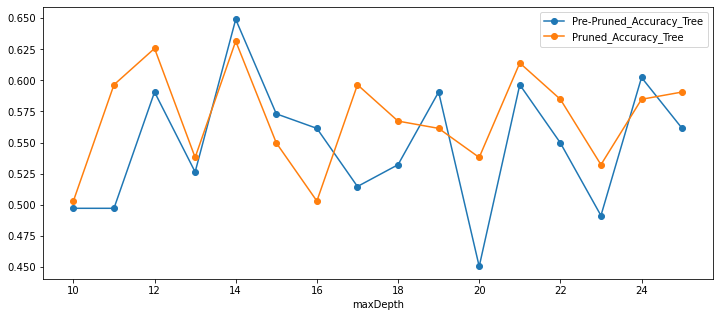

In [92]:
data_analysis.plot(figsize=(12, 5), marker="o")
